# PROBLEM

## A simply supported beam $5 m$ long is loaded with a uniformly distributed load of $10 kN/m$ over a length of $2 m$ as shown:

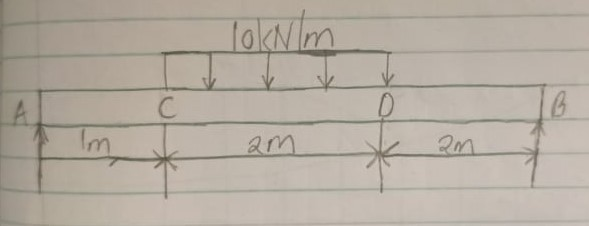

## Make a function to draw shear force and bending moment diagrams and calculate maximum bending moment


# SOLUTION

## Given span $(l)=5m$; Uniformly distributed load $(w)=10kN/m$ and length of the bam $CD$ carrying load $(a)=2m$.

## We find reactions $R_{A} and R_{B}$. Taking moments about A and equating the same,

$$ R_{B}\times5 = (10\times2)\times2 = 40$$

$$R_{B} = \frac{40}{5} = 8kN$$

## and

$$R_{A} = (10\times2)-8= 12kN$$

## Shear force
$$F_{A} = +R_{A} = +12kN $$

$$F_{C} = +12kN $$

$$F_{D} = 12-(10\times2) = -8kN $$

$$F_B = -8kN $$

## Bending Moment
$$ M_{A} = 0 $$

$$ M_{C} = 12\times1 = 12kNm$$

$$ M_{D} = 8\times2 = 16kNm$$

## Shear force and Bending Moment Diagrams
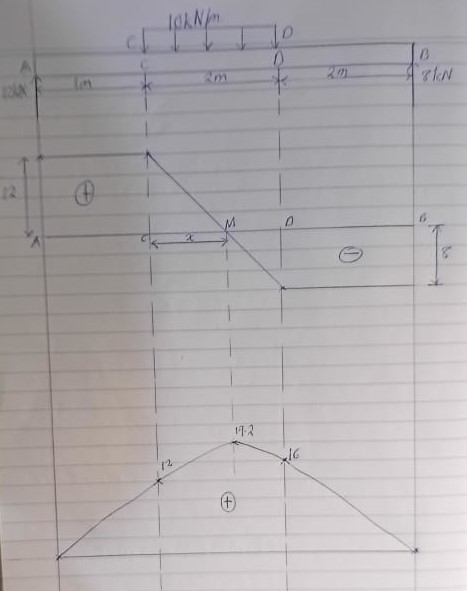

## We know that maximum bending moment will occur at M, where the shear force changes sign. Let x be the distance between C and M. From the geometry of the figure between C and D, we find that

$$ \frac{x}{12} = \frac{2-x}{8}$$

$$ x=1.2m $$

$$M_{M} = 12(1+1.2)-10\times1.2\times\frac{1.2}{2}=19.2kNm$$


# FUNCTION FOR PLOTTING SHEAR FORCE AND BENDING MOMENT DIAGRAM

## Importing Librares

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import planesections as ps

## Function

## Calling Function

# GLOBAL VARIABLES

In [18]:
m = 10
x1 = 1
x2 = 2
x3 = 3
L = x1+x2+x3
w = m*x2

# REAL FUNCTION

In [19]:
def shear_bending():
    
    #calculation of reaction forces
    RB = (w*((x2/2)+x1))/L
    RA = w-RB
    
    #Shear force
    FA = RA
    FC = FA
    FC = FC-w
    FB = -RB
    
    #Bending Moment
    MA = 0
    MC = RA*x1
    MD = RB*x3
    MB = 0
    
    #Maximum bending moment
    x = RB/(RB+RA)
    Mm = RA*(x1+x)-(m*x)*(x/2)
    
    
    
    #PLOTTING SHEAR FORCE AND BENDING MOMENT DIAGRAMS
    
    #Define node locations and support conditions
    beam = ps.newEulerBeam2D(L) 
    
    #Define beam and fixities
    pinned = [1,1,0]
    beam.setFixity(0,pinned,label='RAA')
    beam.setFixity(L,pinned,label='RB')
    
    #Define loads
    Pz = -10000 # This represents 1kN in the donward direction
    
    #We use the addlabel method of the beam object and the first arfument specify the distance from starting label
    beam.addLabel(0,label='A')
    beam.addLabel(1,label='C')
    beam.addLabel(3,label='D')
    beam.addLabel(5,label='B')
    
    #addverticalload method define a point load where the first argument is the position of the load, the second is the load magnitude and the third is the label indicating the load position on the beam
   
    
    #define distributed loads- The first argument is the point where the distributed load starts and the second argument is where it stops and the third is its magnitude
    beam.addDistLoadVertical(1,3,Pz)
    
    #Drawing of the beam diagram using the plot plotBeamDiagram method and our beam object as an argument
    ps.plotBeamDiagram(beam)
    
    #Instantiate the analysis object
    analysis = ps.OpenSeesAnalyzer2D(beam)
    #Run the analysis
    analysis.runAnalysis()
    
    #Plot the shearForce and Bending Moment Diagram
    ps.plotShear2D(beam, scale=0.0002, yunit = 'kN')
    ps.plotMoment2D(beam, scale = 0.0002, yunit = 'kNm')

newEulerBeam2D has been depricated and will return an error in the future. Use newEulerBeam instead.
All 2D plot functions are depricated and will return an error in future releases.           Use the generic plot functions instead, i.e. plotInternalForce instead of plotInternalForce2D
All 2D plot functions are depricated and will return an error in future releases.           Use the generic plot functions instead, i.e. plotInternalForce instead of plotInternalForce2D


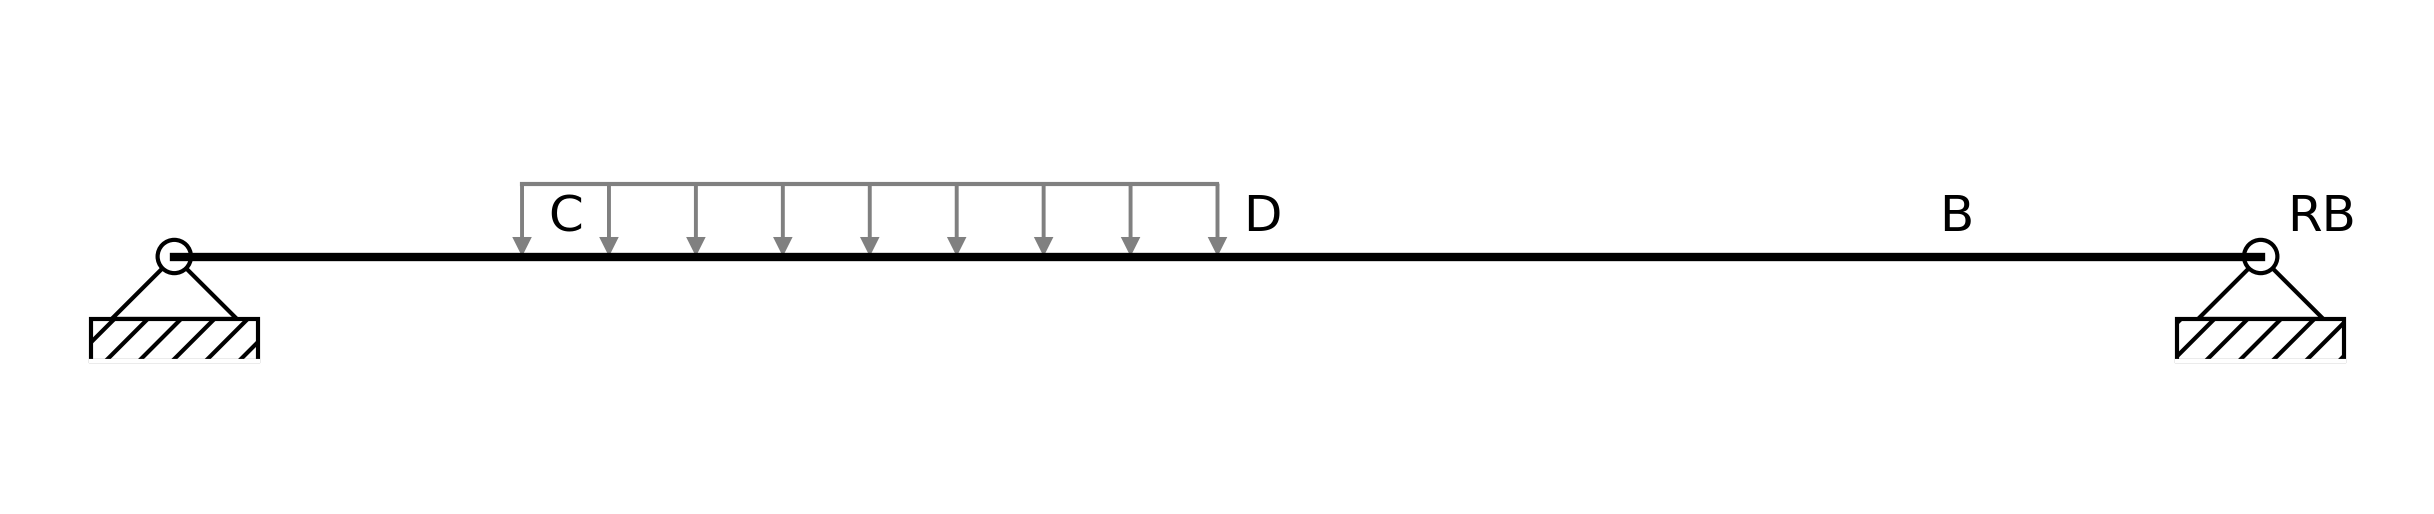

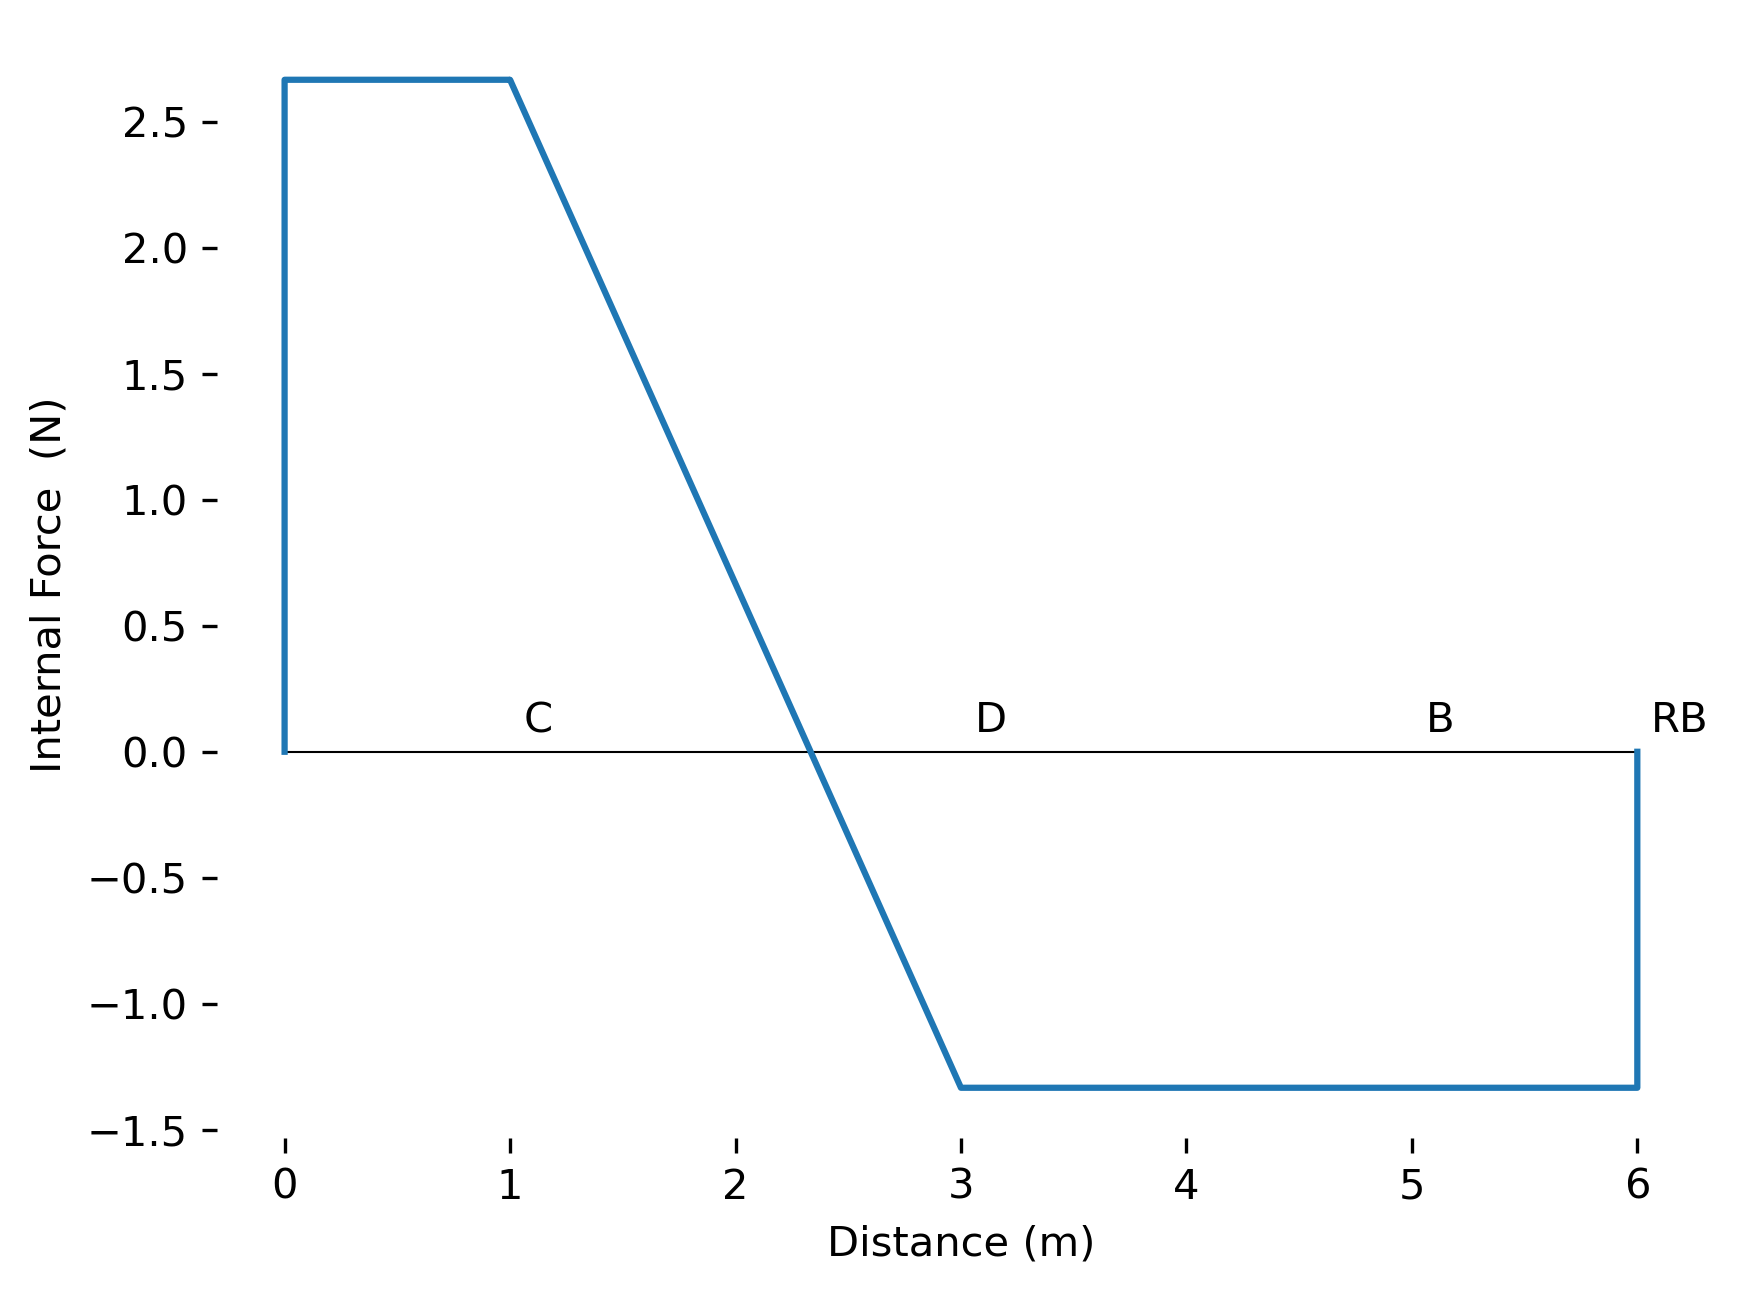

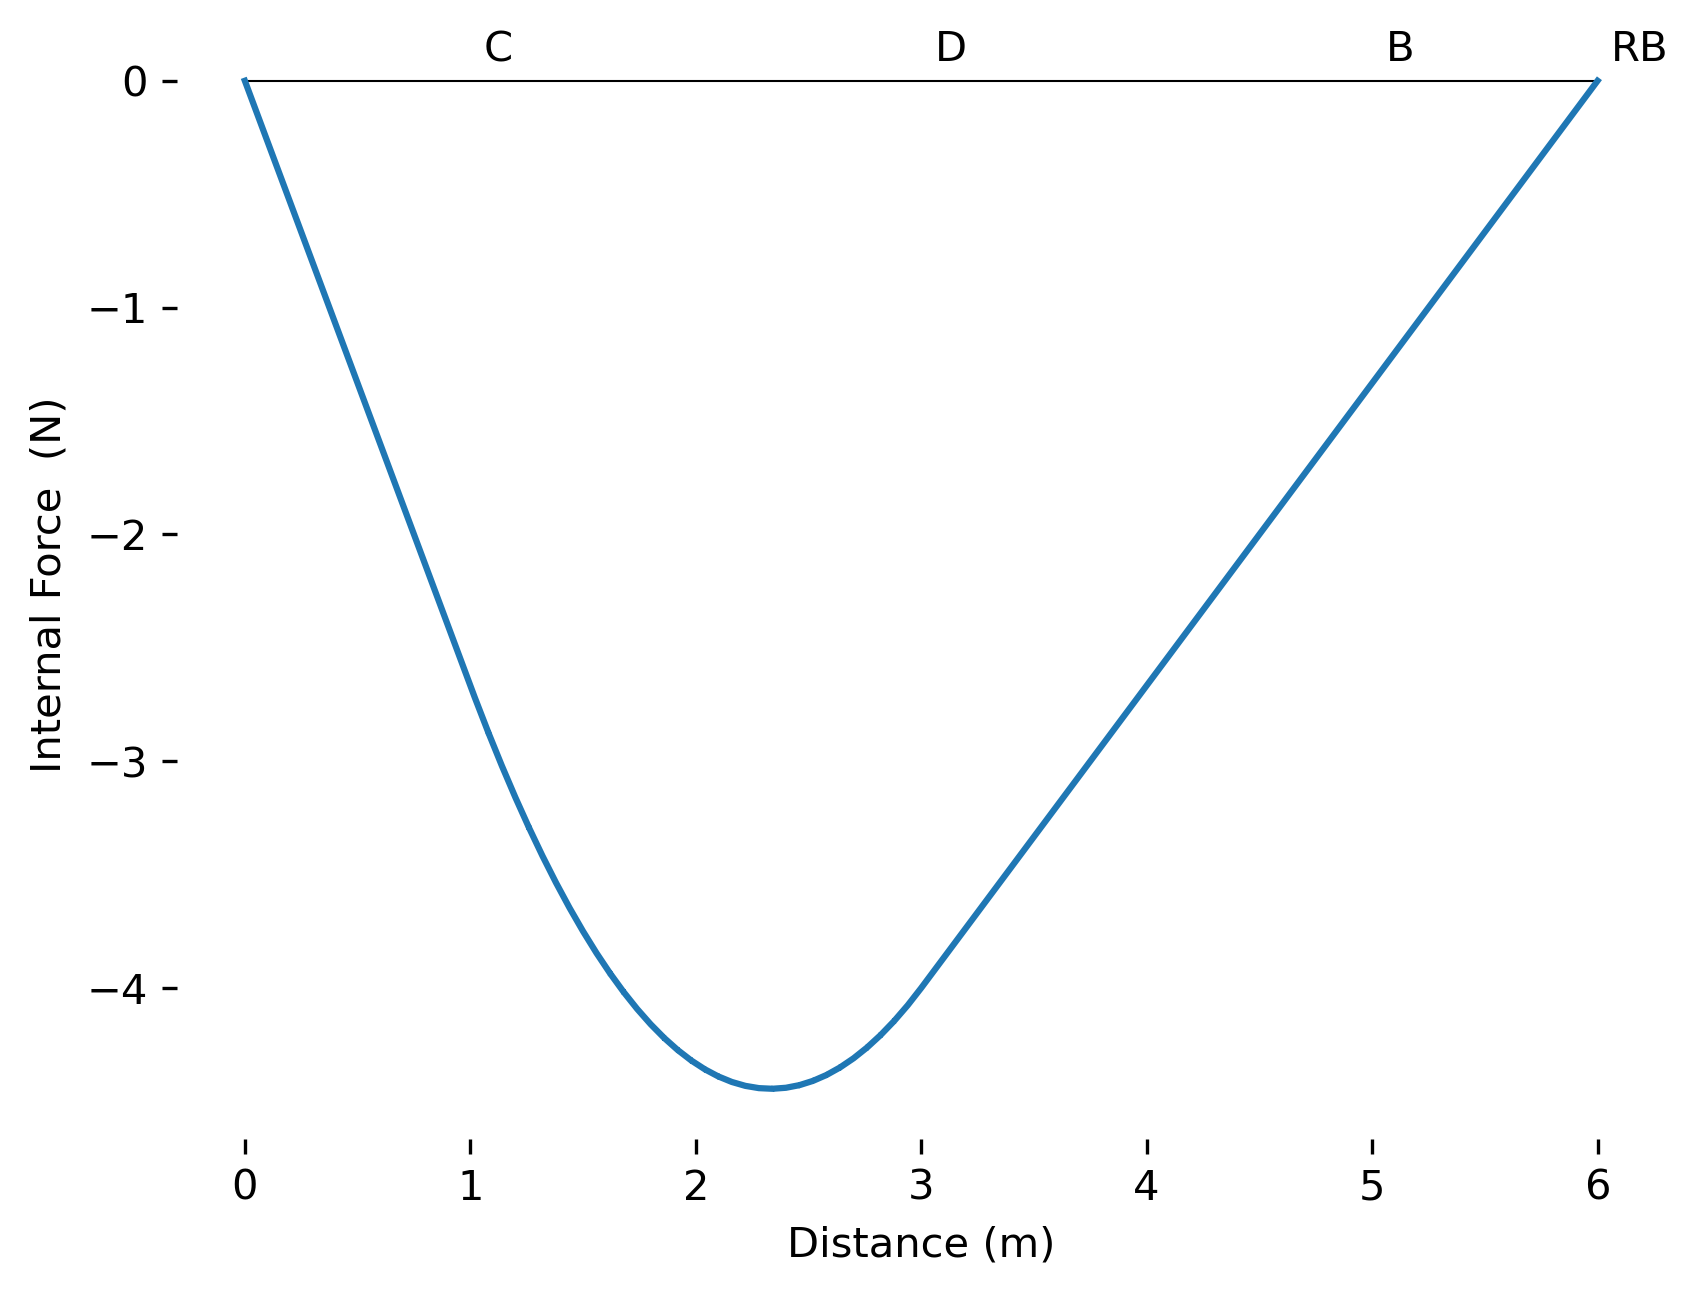

In [20]:
shear_bending()